### Prerequisites

This example remain simple, but you will need to install a small number of dependencies.
In particular these are:
    
* `(py)torch`: The core framework that implements most of the neural network building blocks.
* `numpy`: Which provides efficient handling of numeric data.
* `matplotlib`: A library to generate graphs to visualizes data and results.

In [47]:
!pip install torch
!pip install torchvision
!pip install tqdm

You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.


### Please check if all the dependencies are working:

If this raises an error, please reach out so we can help ;)

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

## Download the Dataset and Initialize a Dataloader

Chances are, that even if MNIST does not mean anything to you, you have seen it in media coverage about machine learning in one way or another. MNIST is a collection of 60.000 **labeled** examples of handwritten digits.

Such datasets have been very important for the machine learning community, to mature from toy examples, to the broadly applied tool machine learning has become today.

The original MNIST data sets is hosted and pusblished at:
http://yann.lecun.com/exdb/mnist/


You can download and unpack the files yourself, but you can also use the torchvision package to download MNIST as well as some other popular datasets.


In [49]:
import torchvision
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])
 
mnist_train = torchvision.datasets.MNIST('./data/', train=True, transform=transform, download=True)
mnist_train = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [50]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

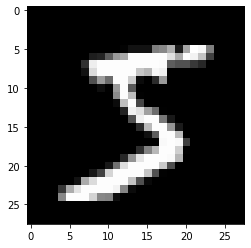

In [51]:
# You can view an example using:
pixels = mnist_train.dataset.data[0]
plt.imshow(pixels, cmap='gray')

## Defining the Neural Network Model

In the following we will look at two ways to define your model.

The first one makes it very easy to define simple feed-forward models: PyTorch introduces the `nn.sequential` container which offers a convienient way to define simple multi-layer feed-fordward neural networks. The nn.sequential container executes a list of layers in the order you provide them, and always passes the output of the previous layer to the one that follows. As you advance to other architectures you will usually work with `nn.Module` which allows you to bundle complex combinations of layers into building blocks which you can then combine into more complicated model architectures.

In this very simple network we are making use of three very basic primitives that PyTorch provides:

* https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
* https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
* https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html


In [58]:
# some of your hyper parameters
input_size = mnist_train.dataset.data.shape[1] * mnist_train.dataset.data.shape[2]
hidden_layers = [128,64]
output_size = 10

In [59]:
input_size

784

In [53]:
modelSequential = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], 10),
    nn.LogSoftmax(dim=1)
)
print(modelSequential)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [54]:
# you can also view the parameters of your model
# list(model.parameters())

In this seconds step we will consider a slightly more pythonic way to define the same neural network model.
As you will turn towards more complex architectures over time, you can hide some complexity into more convienient reuseable building blocks, in PyTorch Jargon these are called `modules`.

In [55]:
# I think we should decide and use only one nn.Module example

import torch.nn as nn
import torch.nn.functional as F

class ModelManual(nn.Module):
    def __init__(self, input_size=None, hidden_layers=None, output_size=None):
        super(ModelManual, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layers[0])
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(hidden_layers[1], output_size)
        self.layer6 = nn.LogSoftmax(dim=1)


    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        return x
    
modelManual = ModelManual(input_size, hidden_layers, output_size)

print(modelManual)

ModelManual(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): ReLU()
  (layer5): Linear(in_features=64, out_features=10, bias=True)
  (layer6): LogSoftmax(dim=1)
)


In [56]:
# I think we should decide and use only one nn.Module example

import torch.nn as nn
import torch.nn.functional as F

class ModelForLoop(nn.Module):
    def __init__(self, input_size=None, hidden_layers=None, output_size=None):
        super(ModelForLoop, self).__init__()
        
        # attach 
        self.layer1 = nn.Linear(input_size, hidden_layers[0])
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(hidden_layers[1], output_size)
        self.layer6 = nn.LogSoftmax(dim=1)
        
        self.layers = [
            self.layer1, self.layer2, self.layer3, self.layer4, self.layer5, self.layer6
        ]

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    
modelForLoop = ModelForLoop(input_size, hidden_layers, output_size)
print(modelForLoop)

ModelForLoop(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): ReLU()
  (layer5): Linear(in_features=64, out_features=10, bias=True)
  (layer6): LogSoftmax(dim=1)
)


## The Training Loop

Unfortunetly, there is a variety of other decisions you can make that determine training success such as the choice of loss function, the choice of optimizer, the batch size and various other so called hyperparameters.

For this reason, it will often be necessary to write or adapt what is referred to to as the training loop. Later, we will show you how other frameworks can make your life easier with respect to the training loop as well. But for now it is useful to implement or adapt one for yourself, as you will gain a better understanding of the effect som of these hyper parameters have.

In [57]:
model = modelSequential

num_epochs = 10

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

for e in range(num_epochs):
    running_loss = 0
    for images, labels in mnist_train:
        # Flatten the Image from 28*28 to 784 column vector
        images = images.view(images.shape[0], -1)
        
        # PyTorch allows you to accumulate gradients, which
        # can be handy to conserve memory and increase performance.
        # But, at this point, we don't to do any of these optimizations as they
        # distract and convolute your training logic. 
        # Thus we have to reset gradients for every new mini-batch.
        optimizer.zero_grad()        
        output = model(images)
        loss = criterion(output, labels)
        
        # backward propagation
        loss.backward()
        
        # update the gradient to new gradients
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {(running_loss/len(trainloader))}")

Training loss: 1.8827007725548897
Training loss: 0.836697991945342
Training loss: 0.5059866161107509
Training loss: 0.41756084894956047
Training loss: 0.3763190460389357
Training loss: 0.3517215777752496
Training loss: 0.33407162839987636
Training loss: 0.3210883144058907
Training loss: 0.31045883361782345
Training loss: 0.3013507863844254


You may have noticed that this cell takes quite a while to execute and even may appear like nothing is happening at first. In fact every epoch takes 5-10 seconds to compute.
Because this can be a little bit frustrating to work with, we would like to introduce you to two little helpers that are worth knowing about, as they might make your life a little easier.

## A little Detour to making your life more convienient/planable?

The Python community and the resulting ecosystem has all sorts of helpful packages and utilities to offer.
One such example is `tqdm`, a little helper, that augments your loops with a progress bar, which becomes especially handy when you are working interactively in jupyter notebooks, but each iteration may be a little bit more computational intensive than is comfortable when working interactively.
tqdm helpfully also attempts to give a time to completion, essential intelligence, to decide if maybe it's a good time to get another coffee ;)

In [45]:
# An alternative way to set up the loop make use of tqdm, a clever helper to display a progress bar.
# Besides progress, also iteration times and a remaining time prediction are displayed by default.
# You can also add your own information, such as key metrics relevant for your model.

import tqdm
import pandas as pd

num_epochs = 20

stats = pd.DataFrame()


# Also add a weaker module to show some discrepancy
modelWeak = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], 10),
    nn.LogSoftmax(dim=1)
)

models = {
    "modelSequential": modelSequential,
    "modelManual": modelManual,
    "modelForLoop": modelForLoop,
    "modelWeak": modelWeak,
}


for modelname, model in tqdm.tqdm(models.items(), position = 0):
    criterion = torch.nn.NLLLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

    epochs = tqdm.tqdm(range(num_epochs), position = 1, leave=False)
    for e in epochs:
        running_loss = 0
        for images, labels in mnist_train:
            # Flatten the Image from 28*28 to 784 column vector
            images = images.view(images.shape[0], -1)

            # PyTorch allows you to accumulate gradients, which
            # can be handy to conserve memory and increase performance.
            # 
            # At this point, we don't to do any of these optimizations as they
            # distract and convolute your training logic. 
            # Thus we reset gradients for every new mini-batch.
            optimizer.zero_grad()        
            output = model(images)
            loss = criterion(output, labels)

            # backward propagation
            loss.backward()

            # update the gradient to new gradients
            optimizer.step()
            running_loss += loss.item()
        else:
            epoch_stats = {
                "epoch": e,
                f"training_loss_{modelname}": running_loss/len(trainloader)
            }
            stats = stats.append(epoch_stats, ignore_index=True)
        
stats

100%|██████████| 4/4 [16:56<00:00, 254.14s/it] 


,epoch,training_loss_modelSequential,training_loss_modelManual,training_loss_modelForLoop,training_loss_modelWeak
0,0.0,0.291534,NaN,NaN,NaN
1,1.0,0.283703,NaN,NaN,NaN
2,2.0,0.275990,NaN,NaN,NaN
3,3.0,0.269388,NaN,NaN,NaN
4,4.0,0.262458,NaN,NaN,NaN
...,...,...,...,...,...
75,15.0,NaN,NaN,NaN,0.267349
76,16.0,NaN,NaN,NaN,0.261641
77,17.0,NaN,NaN,NaN,0.256301
78,18.0,NaN,NaN,NaN,0.251231


<AxesSubplot:xlabel='epoch'>

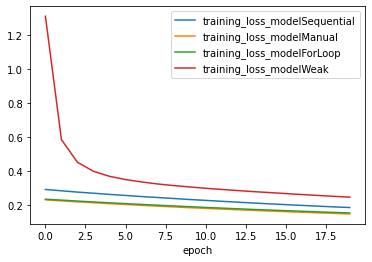

In [46]:
stats.plot(x='epoch')

In [29]:
#TODO: We should decide what we deem more useful:
# Hide some of the python stuff, but then assume people are comfortable to look things up if necessary?
# Expose most of the helper code one is using, but potentially distract from the method?

# from utils import visualize_prediction
# OR
def visualize_prediction(image, prob):
    prob = prob.data.numpy().squeeze()
    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(image, cmap='gray')
    
    ax[1].barh(np.arange(10), prob)
    ax[1].set_aspect(0.1)
    ax[1].set_yticks(np.arange(10))
    ax[1].set_yticklabels(np.arange(10))
    ax[1].set_title('Probability of Class')
    ax[1].set_xlim(0, 1.1)
    plt.tight_layout()

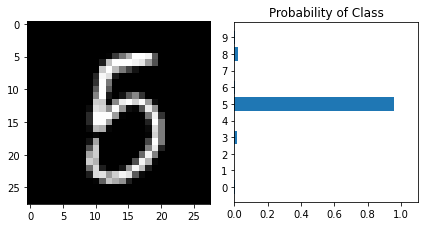

In [30]:
model = modelSequential

# get a sample for which you would like to generate a prediction
images, labels = next(iter(trainloader))
image = images[0][0]
flattened = images[0].view(1, 784)    # flatten


# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(flattened)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
visualize_prediction(image, ps)

## A Earth System Data Example (e.g., Weatherbench, ...)?

Xarray + PyTorch --> keep a few unoptimized parts, for which we could dive deep in the pre-processing course.

Classification: Maybe something like month from temperature + precipation might have enough signal also for short training runs.
Regression: Could extract a timeseries to fit a curve, while also not needing to much data (and thus have quick training turnaround times to just so barely showcase some predictive skill)

(I think it would be good to aim to have some shared goal between different models, and then the participants can see the differences in their expression)